In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import quantities as pq
import seaborn as sns
from tools_plot import plot_psth, fix_figure, savefig, despine, set_style
from tools_analysis import make_spiketrain_trials
import neo
import copy
%matplotlib inline

In [2]:
dataa = np.load('results/triple.npz')['data'][()]

In [3]:
set_style('article', w=.4)
t_stop = dataa['status']['time']
spiketrains = [s['times'] for s in dataa['spiketrains']]
names = ['A', 'B', 'C']
colors = sns.color_palette()

N_trials = 1000
xlim = [-10, 30] * pq.ms

In [4]:
t_stop = dataa['status']['time']
spiketrains_neo = [neo.SpikeTrain(times=np.array(sptr['times'])*pq.ms, 
                              t_start=0*pq.ms, t_stop=t_stop*pq.ms, name=sptr['name'])
               for sptr in dataa['spiketrains']]
epoch = neo.Epoch(times=dataa['epoch']['times'][:N_trials] * pq.ms, 
                  durations=dataa['epoch']['durations'][:N_trials] * pq.ms)

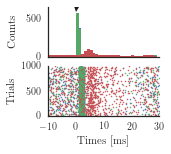

In [16]:
fig, axs = plt.subplots(2,1, sharex=True)
for n, sptr in enumerate(spiketrains_neo):
    plot_psth(spike_train=sptr, epoch=epoch, xlim=xlim, axs=axs, hist_binsize=1*pq.ms,
              color=colors[n], hist_alpha=1., hist_edgecolor=None, 
              hist_ylabel='Counts', rast_size=1, hist_log=False);
sns.despine()
fig = plt.gcf()
ax_h, ax_t = fig.axes
ax_t.set_yticks([0, 500, 1000])
ax_t.set_xticks([-10, 0, 10, 20, 30])
ax_h.plot(0, 610, ls='none', marker='v', color='k', markersize=5)
fig.align_labels()
savefig(fig, 'psth_triple', bbox_inches='tight')